In [1]:
using Pkg
using Revise
using Optim
using Plots
using BenchmarkTools;

In [2]:
function Ψ(R, Z)
    X = 0.1
    Y = -0.1
    a = 0.8
    b = 1.5
    return fit_
end;

In [3]:
# make initial Ψ(ρ,θ)
X₀(ρ) = 0.0
Y₀(ρ) = 0.0
a₀(ρ) = ρ
b₀(ρ) = ρ

R₀(ρ, θ) = X₀(ρ) + a₀(ρ) * cos(θ)
Z₀(ρ, θ) = Y₀(ρ) + b₀(ρ) * sin(θ)

Ψᵢ(ρ, θ) = Ψ(R₀(ρ,θ), Z₀(ρ,θ))
print([Ψᵢ(0.5,0), Ψᵢ(0.5,1.0)])

[0.2544444444444444, 0.16575456482795936]

In [4]:
function quad_trap(f,a,b,N) 
    h = (b-a)/N
    int = h * ( f(a) + f(b) ) / 2
    for k=1:N-1
        xk = (b-a) * k/N + a
        int = int + h*f(xk)
    end
    return int
end;

In [17]:
function f(x, Ψ₀)
    R(θ) = x[1] + x[3] * cos(θ)
    Z(θ) = x[2] + x[4] * sin(θ)
    Δ(θ) = (Ψ(R(θ), Z(θ)) - Ψ₀)^2
    return quad_trap(Δ, 0.0, 2π, 32) #+ 1e-14/(x[3]*x[4])
end

f (generic function with 1 method)

In [18]:
ρ₀ = 0.5
Ψ₀ = 0.25
S = Optim.optimize(x->f(x,Ψ₀), [X₀(ρ₀), Y₀(ρ₀), a₀(ρ₀), b₀(ρ₀)], LBFGS(); autodiff=:forward)
print(S)
print(S.minimizer)

  73.959 μs (430 allocations: 22.64 KiB)
 * Status: success

 * Candidate solution
    Final objective value:     2.180519e-18

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.65e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.20e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.16e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.91e+04 ≰ 0.0e+00
    |g(x)|                 = 2.97e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    12
    f(x) calls:    33
    ∇f(x) calls:   33
[0.09999999971834693, -0.09999999893823373, 0.40000000005261777, 0.7500000004127686]

[0.24999999971370584, 0.25000000061945565]

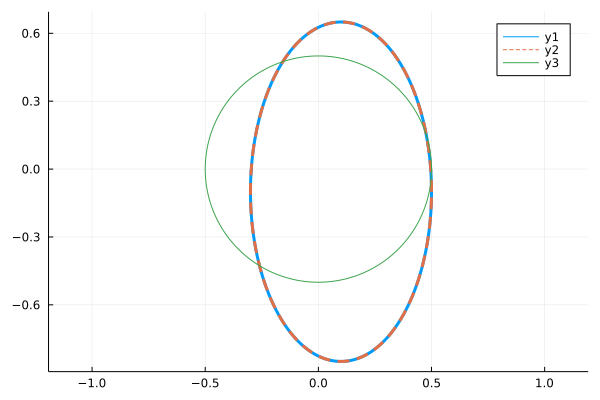

In [10]:
x = S.minimizer

Ψₒ(θ) = Ψ(x[1] + x[3] * cos(θ), x[2] + x[4] * sin(θ))
print([Ψₒ(0), Ψₒ(1.0)])
t = range(0,2π,1001)
plot(0.1 .+ 0.8 * ρ₀ * cos.(t), -0.1 .+ 1.5  * ρ₀ * sin.(t), lw=3)
plot!(x[1] .+ x[3] * cos.(t), x[2] .+ x[4] * sin.(t), lw=3, ls=:dash)
plot!(0.0 .+  ρ₀ * cos.(t), 0.0 .+  ρ₀ * sin.(t),aspect_ratio=:equal)

In [12]:
function fit(N, doPlot=false)
    doPlot & p = plot(aspect_ratio=:equal)
    x₀= [X₀(1), Y₀(1), a₀(1), b₀(1)]
    for ρ in range(1, 1.0/N, N)
        S = Optim.optimize(x->f(x, ρ^2), x₀, LBFGS(); autodiff=:forward)
        x₀ = S.minimizer
        if doPlot
            plot!(p, 0.1 .+ 0.8 * ρ * cos.(t), -0.1 .+ 1.5 * ρ * sin.(t), lw=3, color=:black)
            plot!(p, x₀[1] .+ x₀[3] * cos.(t), x₀[2] .+ x₀[4] * sin.(t), lw=2, color=:red, ls=:dash)
        end
    end
    if doPlot
        display(p) 
        plot!(p,xlim=(0.08,0.12),ylim=(-0.12,-0.08))
        display(p)
    end
end


fit (generic function with 2 methods)

In [16]:
@btime fit(256)

  7.671 ms (51794 allocations: 3.12 MiB)
